# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah "Extrovert vs Introvert Behavior Data" dari Kaggle. Dataset ini berisi data perilaku yang dapat digunakan untuk memprediksi apakah seseorang adalah ekstrovert atau introvert. Tujuan analisis ini adalah untuk memahami pola perilaku dan membangun model prediksi.
   
   Link Dataset: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data

   <br>
2. **Deskripsi Kolom**:


| **Nama Kolom**              | **Deskripsi**                                                                          | **Tipe Data** | **Range / Kategori**  |
| --------------------------- | -------------------------------------------------------------------------------------- | ------------- | --------------------- |
| `Time_spent_Alone`          | Jumlah jam yang dihabiskan sendirian setiap hari.                                      | Numerik       | 0 – 11             |
| `Stage_fear`                | Apakah memiliki rasa takut tampil di depan umum.                                       | Kategorikal   | Yes / No              |
| `Social_event_attendance`   | Frekuensi menghadiri acara sosial (per minggu atau periode tertentu).                  | Numerik       | 0 – 10                |
| `Going_outside`             | Frekuensi pergi keluar rumah dalam seminggu.                                           | Numerik       | 0 – 7                 |
| `Drained_after_socializing` | Apakah merasa lelah setelah berinteraksi sosial.                                       | Kategorikal   | Yes / No              |
| `Friends_circle_size`       | Jumlah teman dekat atau lingkaran pertemanan inti.                                     | Numerik       | 0 – 15                |
| `Post_frequency`            | Frekuensi posting di media sosial (per minggu atau bulan, tergantung konteks dataset). | Numerik       | 0 – 10                |
| `Personality`               | Label kepribadian target untuk klasifikasi.                                            | Kategorikal   | Extrovert / Introvert |



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

###  Membaca Dataset Personality dari file CSV ke DataFrame Pandas

In [2]:
df = pd.read_csv('../personality_dataset.csv')

### Menampilkan 5 baris teratas pada dataset


In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Menghitung jumlah baris dan kolom pada dataset

In [4]:
print(f"Jumlah baris (data): {df.shape[0]}")
print(f"Jumlah kolom (fitur): {df.shape[1]}")

Jumlah baris (data): 2900
Jumlah kolom (fitur): 8


### Menampilkan Informasi Dataset

In [5]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


### Mengecek jumlah data duplikat

In [6]:
# Mengecek jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

# Menampilkan data duplikat jika ada
if jumlah_duplikat > 0:
    display(df[df.duplicated(keep=False)])
else:
    print("Tidak ada data duplikat yang ditemukan.")

Jumlah data duplikat: 388


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
13,3.0,No,6.0,4.0,No,10.0,7.0,Extrovert
20,10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert
23,9.0,Yes,2.0,2.0,Yes,1.0,0.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


### Mengecek jumlah missing value

In [8]:
# Mengecek jumlah missing value pada setiap kolom
missing_values = df.isnull().sum()
print("Jumlah missing value per kolom:\n", missing_values)

# Menampilkan data yang memiliki missing value
if missing_values.sum() > 0:
    display(df[df.isnull().any(axis=1)])
else:
    print("Tidak ada data yang memiliki missing value.")

Jumlah missing value per kolom:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
33,8.0,Yes,3.0,3.0,NaN,2.0,0.0,Introvert
41,1.0,No,4.0,5.0,No,NaN,10.0,Extrovert
59,NaN,No,9.0,4.0,No,7.0,5.0,Extrovert
71,1.0,No,NaN,5.0,No,11.0,8.0,Extrovert
...,...,...,...,...,...,...,...,...
2882,1.0,NaN,9.0,3.0,No,7.0,6.0,Extrovert
2885,10.0,Yes,0.0,0.0,NaN,2.0,0.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert


### Menampilkan Statistik Deskriptif untuk Seluruh Kolom

In [9]:
print("Statistik Deskriptif untuk Seluruh Kolom:")
display(df.describe(include='all'))

Statistik Deskriptif untuk Seluruh Kolom:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2837.000000,2827,2838.000000,2834.000000,2848,2823.000000,2835.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1417,NaN,NaN,1441,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.479192,NaN,2.903827,2.247327,NaN,4.289693,2.926582,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.000000,3.000000,NaN,5.000000,3.000000,NaN
75%,8.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


### Distribusi variabel target


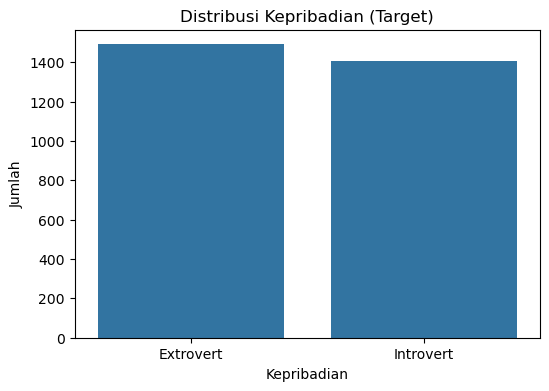

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df)
plt.title('Distribusi Kepribadian (Target)')
plt.xlabel('Kepribadian')
plt.ylabel('Jumlah')
plt.show()

### Analisis Univariat untuk variabel kategorikal

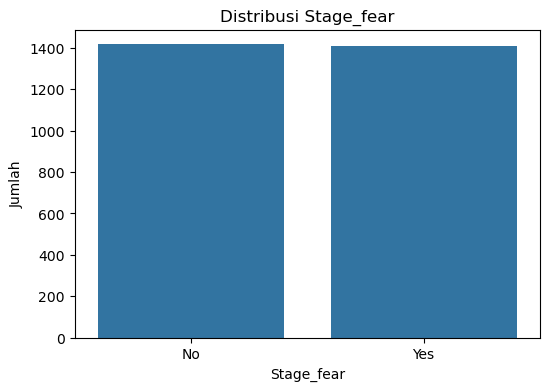

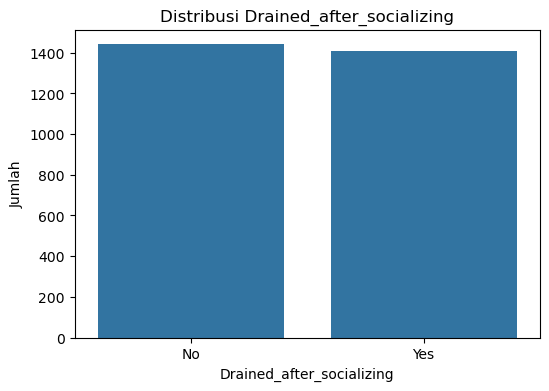

In [11]:
categorical_col = ['Stage_fear', 'Drained_after_socializing']

for col in categorical_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

### Analisis Univariat untuk variabel numerik


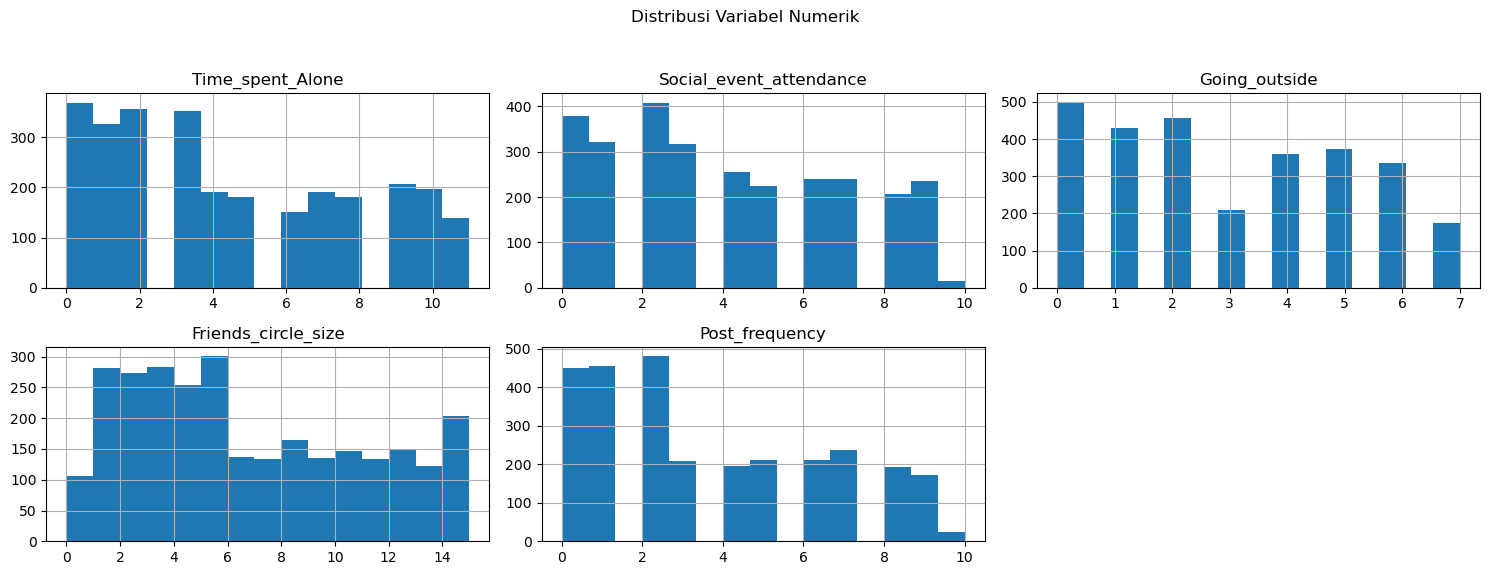

In [12]:
numerical_col = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

df[numerical_col].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribusi Variabel Numerik')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Mengecek Outlier pada Fitur Numerik

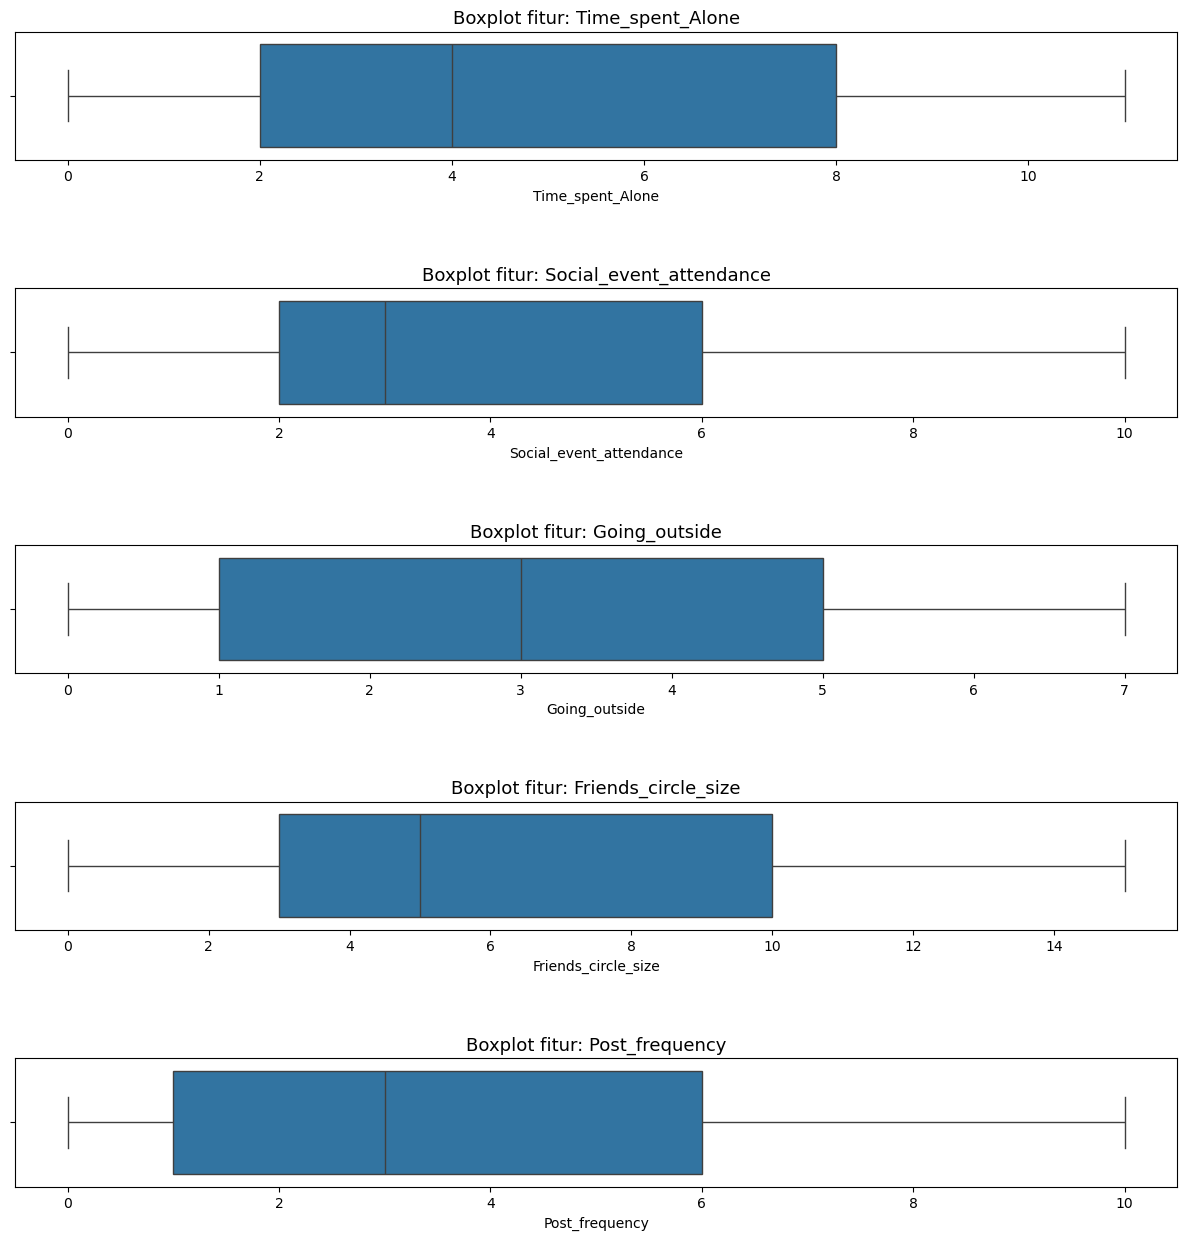

,Fitur,Q1,Q3,IQR,Batas Bawah,Batas Atas,Jumlah Outlier
0,Time_spent_Alone,2.0,8.0,6.0,-7.0,17.0,0
1,Social_event_attendance,2.0,6.0,4.0,-4.0,12.0,0
2,Going_outside,1.0,5.0,4.0,-5.0,11.0,0
3,Friends_circle_size,3.0,10.0,7.0,-7.5,20.5,0
4,Post_frequency,1.0,6.0,5.0,-6.5,13.5,0


In [13]:
# Membuat subplot
fig, axes = plt.subplots(len(numerical_col), 1, figsize=(15, len(numerical_col) * 3))

for i, col in enumerate(numerical_col):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot fitur: {col}', fontsize=13)

plt.subplots_adjust(hspace=1)  # jarak antar boxplot
plt.show()

outlier_info = []

for col in numerical_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    outlier_info.append({
        'Fitur': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Batas Bawah': lower_bound,
        'Batas Atas': upper_bound,
        'Jumlah Outlier': total_outliers
    })

# Tampilkan sebagai DataFrame
outlier_df = pd.DataFrame(outlier_info)
outlier_df

### Analisis Bivariat: Hubungan antar variabel numerik


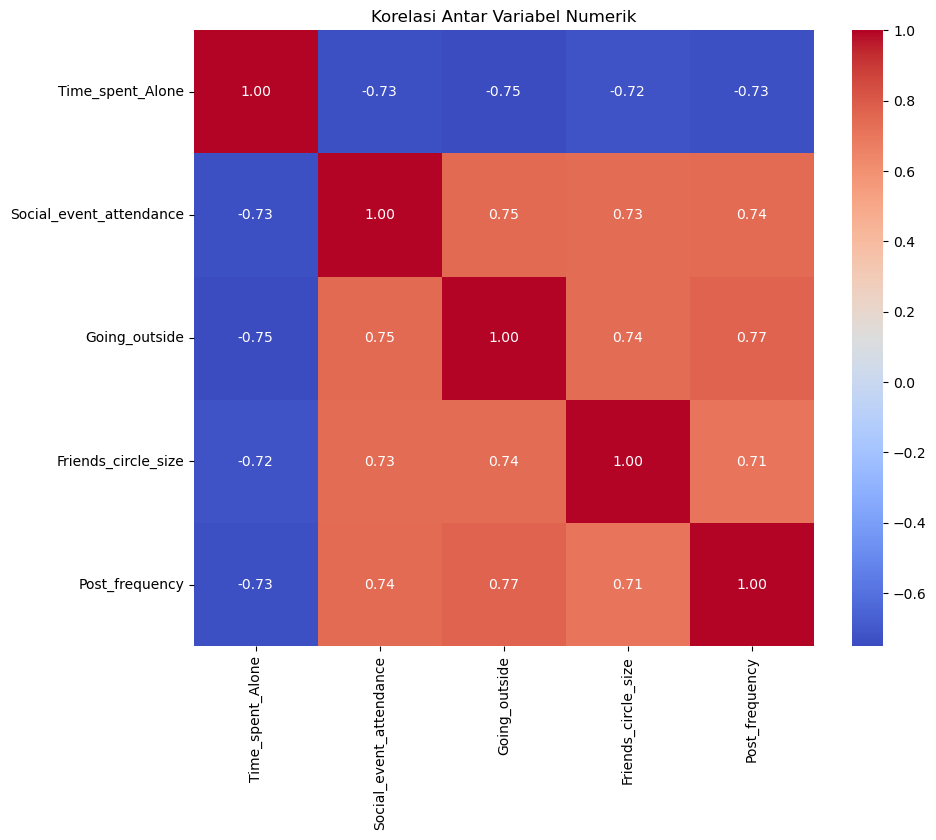

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
categorical_col = ['Stage_fear', 'Drained_after_socializing']
numerical_col = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

### Menangani Data Kosong (Missing Values)

In [16]:
# Fitur numerik: imputasi dengan nilai median
numeric_imputer = SimpleImputer(strategy='median')
df[numerical_col] = numeric_imputer.fit_transform(df[numerical_col])

# Fitur kategorikal: imputasi dengan modus (nilai yang paling sering muncul)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_col] = categorical_imputer.fit_transform(df[categorical_col])

### Encoding Data

In [17]:
# Encode target variable Personality: Extrovert=0, Introvert=1
df['Personality'] = (df['Personality'] == 'Introvert').astype(int)
print("Encoded target variable Personality: {'Extrovert': 0, 'Introvert': 1}")

# Encoding biner untuk kolom kategorikal Yes=1, No=0 
df[categorical_col] = (df[categorical_col] == 'Yes').astype(int)


Encoded target variable Personality: {'Extrovert': 0, 'Introvert': 1}


### Feature engineering

In [18]:
# Rasio aktivitas sosial vs. waktu sendirian
df['social_alone_ratio'] = (df['Social_event_attendance'] + df['Going_outside']) / (df['Time_spent_Alone'] + 1)

# Banyaknya teman dan frekuensi posting
df['friends_and_posts'] = df['Friends_circle_size'] * df['Post_frequency']

# Interaksi lelah setelah sosial dan kehadiran acara
df['drained_by_social'] = df['Drained_after_socializing'] * df['Social_event_attendance']

### Normalisasi fitur

In [20]:
# Definisikan semua kolom numerik, termasuk yang baru
all_numerical_col = numerical_col + ['social_alone_ratio', 'friends_and_posts', 'drained_by_social']
    
# Normalisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()
df[all_numerical_col] = scaler.fit_transform(df[all_numerical_col])

# Tampilkan 5 baris pertama setelah normalisasi
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,social_alone_ratio,friends_and_posts,drained_by_social
0,-0.143788,0,0.019907,1.350613,0,1.596787,0.500271,0,-0.288607,1.028065,-0.672045
1,1.309119,1,-1.371160,-1.350613,1,-1.471766,-0.190744,1,-0.830243,-0.913449,-0.672045
2,1.309119,1,-1.023393,-0.450204,1,-0.291553,-0.536251,1,-0.748998,-0.614755,0.261351
3,-1.306113,0,0.715440,1.800817,0,1.832829,1.536793,0,2.690389,2.431930,-0.672045
4,-0.434369,0,1.758740,0.450204,0,0.416574,0.500271,0,0.049915,0.281329,-0.672045


### Menyimpan dataset

In [21]:
df.to_csv('personality_dataset_preprocessing.csv', index=False)
print("\nDataset berhasil disimpan sebagai 'personality_dataset_preprocessing.csv'")


Dataset berhasil disimpan sebagai 'personality_dataset_preprocessing.csv'
